In [1]:
import numpy as np
from matplotlib import pyplot as plt
import math

import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Input, Dropout, Flatten
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.models import Model
from keras.layers import ConvLSTM2D

import pandas as pd

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error

import seaborn as sns

Using TensorFlow backend.


In [2]:
merged_data = pd.DataFrame()

data = pd.read_csv('normal_icab1-mavros-imu-data.csv', header=None)
filter_data=data.loc[1:, [18,19,20,30,31,32]]

filter_data
#scale = MinMaxScaler(feature_range=(0, 1)) # define a scaler of range (0,1)
#filter_data = scale.fit_transform(filter_data)
filter_data

18                      19                       20  \
1      0.0013594776391983032   0.0023656077682971954    0.0002578999847173688   
2     -0.0023343218490481377   0.0033537372946739197      0.00142670189961791   
3     -0.0031726378947496414   0.0022720620036125187     0.002434065099805593   
4     -0.0025794897228479385   0.0028733722865581517    0.0029229284264147277   
5     -0.0009925668127834797     0.00370432622730732    0.0027033882215619083   
6     -0.0010771849192678928   0.0012310035526752478     0.004441524855792522   
7     -0.0004363730549812317    0.003059929236769677    0.0065137543715536594   
8       -0.00241048913449049    0.004574693739414216    0.0055512581020593635   
9     -0.0004156408831477165    0.004230566322803498    0.0057276557199656955   
10     3.500375896692276e-05   0.0046947766095399865     0.006000665947794913   
11    -0.0013024499639868736    0.003293804824352265     0.005112646613270044   
12     0.0001821187324821949    0.005276808515191079     0.005798553582280873   
13     0.0003153560683131218   0.0031344797462224965     0.004507063422352076   
14     0.0011080880649387836    0.005449460819363594     0.003397841937839984   
15     0.0007695734966546297    0.004744956269860268    0.0033844551071524616   
16    -0.0018682274967432022    0.007823210209608078     0.005520280916243791   
17     -0.005228550173342228    0.006295198574662209      0.00845260638743639   
18     -0.004251610487699509    0.005048537626862527     0.009012381546199322   
19    -0.0023475480265915394    0.005178272724151612     0.008236770518124104   
20    -0.0026251100935041904   0.0032861623913049707     0.006986371241509914   
21   -0.00018217973411083221   0.0026728026568889627     0.007054692134261131   
22      0.001534086186438799     0.00337742641568184     0.006155326496809721   
23      0.002381423255428672    0.004098478704690934     0.004298479296267032   
24     0.0031140847131609917   0.0033713560551404957    0.0050154635682702065   
25     0.0014176212716847658     0.00418505258858204     0.005066860001534223   
26    -0.0032075392082333565    0.002093520015478135     0.006244795396924019   
27     -0.007238403428345919    0.004647228866815568      0.00931362435221672   
28     -0.009074779227375984    0.004486957564949991      0.01103449147194624   
29     -0.011623735539615154     0.00581047683954239     0.010170156136155128   
30     -0.011160713620483875    0.004090560600161553     0.009003965184092522   
..                       ...                     ...                      ...   
834   -0.0010435297153890133   0.0016914252191781998    0.0006144717335700987   
835   -0.0006919330917298794      0.0027450080960989   -0.0004861559718847278   
836   -8.146092295646667e-05    0.002011457458138466   -0.0011677546426653864   
837    0.0017983245197683573   0.0005114916712045667   -0.0015626037493348122   
838    0.0008355649188160896   0.0006112884730100632  -0.00044161919504404073   
839   -0.0005486705340445042    0.002586742863059044   -0.0006575882434844974   
840  -4.5050401240587234e-05    0.003075292333960533   -0.0009479690343141559   
841   -5.687866359949112e-05    0.002657176926732063    -0.002541613765060902   
842    0.0003405963070690632   0.0021116007119417186    -0.002700826153159142   
843    0.0006013894453644753   0.0016042068600654602   -0.0008274763822555544   
844    0.0001861806958913803   0.0029337462037801743   0.00018650945276021922   
845   -0.0015332377515733242   0.0034696925431489944   0.00035006646066904025   
846   -0.0010187779553234577    0.003444751724600792  -0.00011936947703361553   
847   -0.0005069938488304615   0.0023326314985752106   -0.0010296264663338663   
848   -0.0020783827640116215   0.0031925328075885773  -1.4869496226311121e-05   
849   -0.0027422672137618065   0.0028470754623413086    0.0012806579470634456   
850   -0.0019147726707160473   0.0025446321815252304     0.001155436038970947   
851   -0.0008583185262978077   0.0017849821597337725    0

In [3]:
scaler = MinMaxScaler()
X__train = scaler.fit_transform(filter_data)
#X_test = scaler.transform(test)

X__train

array([[0.53072881, 0.5090145 , 0.48836283, 0.44964029, 0.52028219,
        0.5539823 ],
       [0.50839512, 0.51332342, 0.49686321, 0.41510791, 0.52028219,
        0.57168142],
       [0.50332644, 0.50860658, 0.50418948, 0.4       , 0.5361552 ,
        0.56460177],
       ...,
       [0.51214576, 0.50398214, 0.48617342, 0.40503597, 0.51675485,
        0.56637168],
       [0.51473484, 0.49879715, 0.49417059, 0.4057554 , 0.50970018,
        0.56460177],
       [0.52038458, 0.50084938, 0.48828517, 0.4028777 , 0.50970018,
        0.56637168]])

In [4]:
train_size = int(len(X__train) * 0.66) # take 2/3 of whole data for train
test_size = len(X__train) - train_size
#print("train_size : ", train_size)
#print("test_size : ", test_size)

train, test = X__train[0:train_size,:], X__train[train_size:len(X__train),:]
#print("train : ", train)
#print("test : ", test)
print(train.shape)
print(test.shape)

(569, 6)
(294, 6)


In [7]:
#Preprocessing the data to feed the LSTM Forecaster. Here we forecast the next vector using 3 previous vectors.

def to_sequences(dataset, seq_size=1):
    x = []
    y = []

    for i in range(len(dataset)-seq_size-1):
        window = dataset[i:(i+seq_size), :]
        x.append(window)
        y.append(dataset[i+seq_size, :])
        
    return np.array(x),np.array(y)
    

seq_size = 3  # Number of time steps to look back 


trainX, trainY = to_sequences(X__train, seq_size)
trainY = trainY.reshape(trainY.shape[0], 1, trainY.shape[1])
trainX2=np.zeros((trainX.shape[0],1,6))


print("Shape of training set Input : ", trainX.shape)
print("Shape of training set Output: ", trainY.shape)
print("Shape of the zero vector: ", trainX2.shape)



Shape of training set Input :  (859, 3, 6)
Shape of training set Output:  (859, 1, 6)
Shape of the zero vector:  (859, 1, 6)


In [86]:
from keras.models import Model
#import keras.optimizers.adam as a
n_input=6
n_units=256
n_output=6
time_step=3
encoder_inputs = Input(shape=(time_step, n_input))
encoder = LSTM(n_units, return_state=True)
encoder_outputs, state_h, state_c = encoder(encoder_inputs)
encoder_states = [state_h, state_c]
# define training decoder
decoder_inputs = Input(shape=(1,n_output))
decoder_lstm = LSTM(n_units, return_sequences=True)
decoder_outputs = decoder_lstm(decoder_inputs, initial_state=encoder_states)
decoder_dense = Dense(n_output, activation='tanh')
decoder_outputs = decoder_dense(decoder_outputs)
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.compile(optimizer="adam",loss="mse",metrics=["accuracy"])
model.summary()
print('Train...')

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 3, 6)         0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            (None, 1, 6)         0                                            
__________________________________________________________________________________________________
lstm_5 (LSTM)                   [(None, 256), (None, 269312      input_5[0][0]                    
__________________________________________________________________________________________________
lstm_6 (LSTM)                   (None, 1, 256)       269312      input_6[0][0]                    
                                                                 lstm_5[0][1]               

In [87]:
model.fit([trainX,trainX2],trainY,epochs=500)
model.save("LSTM_forecaster.hdf5")

Epoch 1/500
859/859 [==============================] - 2s 2ms/step - loss: 0.0603 - accuracy: 0.2142
Epoch 2/500
859/859 [==============================] - 0s 434us/step - loss: 0.0151 - accuracy: 0.29220s - loss: 0.0158 - accuracy: 0.
Epoch 3/500
859/859 [==============================] - 0s 403us/step - loss: 0.0130 - accuracy: 0.4016
Epoch 4/500
859/859 [==============================] - 0s 378us/step - loss: 0.0114 - accuracy: 0.4552
Epoch 5/500
859/859 [==============================] - 0s 402us/step - loss: 0.0100 - accuracy: 0.5052
Epoch 6/500
859/859 [==============================] - 0s 389us/step - loss: 0.0090 - accuracy: 0.5390
Epoch 7/500
859/859 [==============================] - 0s 384us/step - loss: 0.0081 - accuracy: 0.5576
Epoch 8/500
859/859 [==============================] - 0s 395us/step - loss: 0.0077 - accuracy: 0.5565
Epoch 9/500
859/859 [==============================] - 0s 404us/step - loss: 0.0072 - accuracy: 0.5786
Epoch 10/500
859/859 [=====================

In [88]:
data_thresh = pd.read_csv('icab1-mavros-imu-data.csv', header=None)
filter_data_thresh=data_thresh.loc[1:, [18,19,20,30,31,32]]

scaler = MinMaxScaler()
X_thresh = scaler.fit_transform(filter_data_thresh)


seq_size = 3  # Number of time steps to look back 

threshX, threshY = to_sequences(X_thresh, seq_size)
threshY = threshY.reshape(threshY.shape[0], 1, threshY.shape[1])
threshX2=np.zeros((threshX.shape[0],1,6))

print("Shape of training set Input : ", threshX.shape)
print("Shape of training set Output: ", threshY.shape)
print("Shape of the zero vector: ", threshX2.shape)

Shape of training set Input :  (1443, 3, 6)
Shape of training set Output:  (1443, 1, 6)
Shape of the zero vector:  (1443, 1, 6)


In [89]:
#Find out the threshold for an Abnormal case. 
#We use the mean square error to calculate the error and select the maximum value of that as the Threshold.

x_pred = model.predict([threshX,threshX2])

# print(x_pred[0][0]-y_test[0])
Error_bin=[]

for i in range(len(threshX)):
    error=np.abs(np.mean(x_pred[i]**2-threshY[i]**2))
    Error_bin.append(error)
    
threshold=max(Error_bin)

print(threshold)

0.12170422506258906


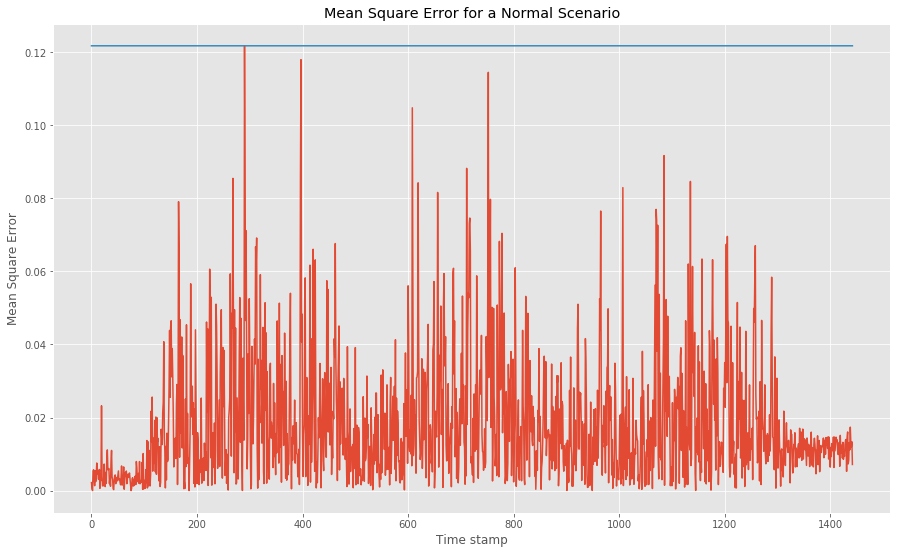

In [90]:
plt.figure(figsize=(15,9))
plt.plot(Error_bin)
Ones=np.ones(len(Error_bin))           
thresh_line=threshold*Ones
plt.plot(thresh_line)
plt.title("Mean Square Error for a Normal Scenario")
plt.xlabel('Time stamp')
plt.ylabel('Mean Square Error')
plt.show()

In [ ]:
#Above graph shows the Mean Square Error variation for a Normal Scenarion. Threshhold is taken as the maximum error of this scenario. 

In [91]:
#Testing the Model for an Abnormal Scenario

data_test = pd.read_csv('test_icab1-mavros-imu-data.csv', header=None)
filter_data_test=data_test.loc[1:, [18,19,20,30,31,32]]

scaler = MinMaxScaler()
X_test = scaler.fit_transform(filter_data_test)
#X_test = scaler.transform(test)

seq_size = 3  # Number of time steps to look back 

testX, testY = to_sequences(X_test, seq_size)
testY = testY.reshape(testY.shape[0], 1, testY.shape[1])
testX2=np.zeros((testX.shape[0],1,6))


print("Shape of training set Input : ", testX.shape)
print("Shape of training set Output: ", testY.shape)
print("Shape of the zero vector: ", testX2.shape)

Shape of training set Input :  (755, 3, 6)
Shape of training set Output:  (755, 1, 6)
Shape of the zero vector:  (755, 1, 6)


Anomrmaly detected
Anomrmaly detected
Anomrmaly detected
Anomrmaly detected
Anomrmaly detected
Anomrmaly detected
Anomrmaly detected


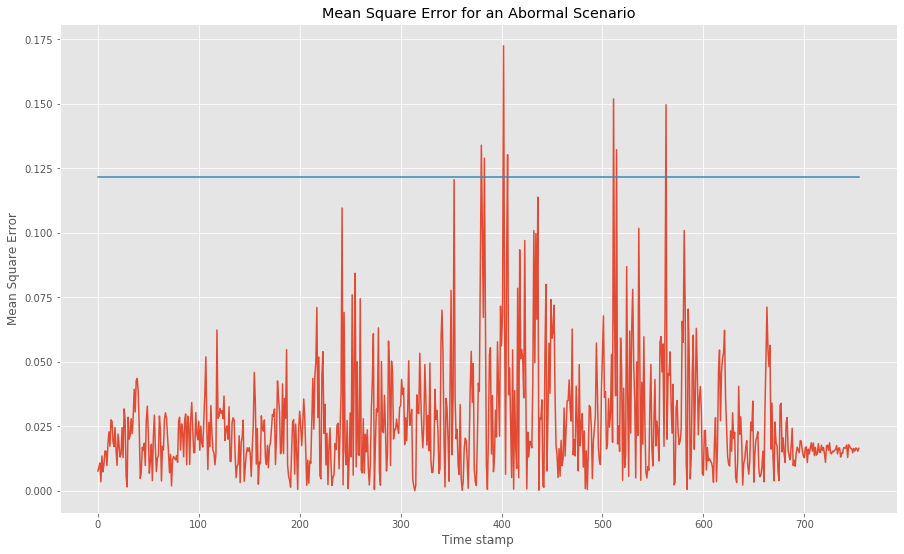

In [92]:
x_pred_test = model.predict([testX,testX2])

Error_bin_test=[]

for i in range(len(testX)):
    error=np.abs(np.mean(x_pred_test[i]**2-testY[i]**2))
    Error_bin_test.append(error)
    if (error>threshold):
        print("Anomrmaly detected")

plt.figure(figsize=(15,9))
plt.plot(Error_bin_test)
plt.plot(thresh_line[:len(Error_bin_test)])
plt.title("Mean Square Error for an Abormal Scenario")
plt.xlabel('Time stamp')
plt.ylabel('Mean Square Error')
plt.show()

In [ ]:
#Above graph shows the Mean Square Error variation for an Abnormal Scenarion. We can clearly see that some values are exceeding the threshold. These points are detectesd as Abnomalities.